In [3]:
import gym
import safety_gym

env = gym.make('CostContState/Safexp-PointPush2-v0')
env.reset()
env.obs_space_dict

OrderedDict([('robot_xytheta', Box(3,)),
             ('accelerometer', Box(3,)),
             ('velocimeter', Box(3,)),
             ('gyro', Box(3,)),
             ('magnetometer', Box(3,)),
             ('box_pos', Box(2,)),
             ('box_compass', Box(2,)),
             ('goal_pos', Box(2,)),
             ('goal_compass', Box(2,)),
             ('hazards_pos', Box(8,)),
             ('hazards_compass', Box(8,)),
             ('pillars_pos', Box(8,)),
             ('pillars_compass', Box(8,))])

In [4]:
sorted(env.obs_space_dict.keys())

['accelerometer',
 'goal_compass',
 'goal_lidar',
 'goal_pos',
 'gyro',
 'magnetometer',
 'robot_xytheta',
 'velocimeter']

In [2]:
env.reset()

array([ 0.00000000e+00,  0.00000000e+00,  9.81000000e+00, -8.49652897e-01,
        5.24693178e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.11181340e-01,  7.61296402e-01,
        4.50115062e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.66750647e-01, -4.58964566e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.71596625e-01, -1.66122316e-01,
        0.00000000e+00, -9.42671284e-03, -9.29279579e-03,  1.23211393e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [6]:
env.obs_space_dict

OrderedDict([('robot_xytheta', Box(3,)),
             ('accelerometer', Box(3,)),
             ('velocimeter', Box(3,)),
             ('gyro', Box(3,)),
             ('magnetometer', Box(3,)),
             ('goal_pos', Box(2,)),
             ('goal_compass', Box(2,)),
             ('goal_lidar', Box(16,))])

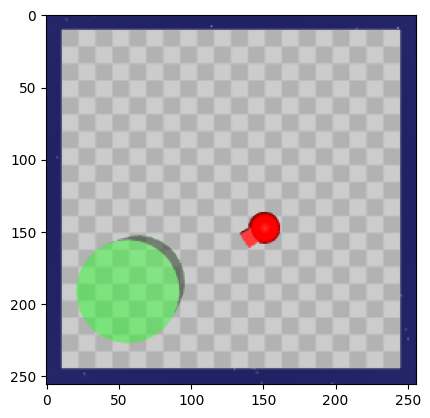

In [259]:
import matplotlib.pyplot as plt
plt.imshow(env.render(mode='rgb_array', camera_id=0, width=256, height=256))

In [283]:
np.hstack([env.obs_compass(p) for p in env.hazards_pos])

([array([-0.24517341,  0.96897385]),
  array([-0.97096697,  0.2375237 ]),
  array([-0.93329538,  0.35759175]),
  array([-0.96882408,  0.24505054]),
  array([-0.7986971 ,  0.60087069]),
  array([-0.86216555,  0.5043844 ]),
  array([-0.62848579,  0.77699167]),
  array([-0.52478521,  0.85063799])],
 array([-0.24517341,  0.96897385, -0.97096697,  0.2375237 , -0.93329538,
         0.35759175, -0.96882408,  0.24505054, -0.7986971 ,  0.60087069,
        -0.86216555,  0.5043844 , -0.62848579,  0.77699167, -0.52478521,
         0.85063799]))

In [280]:
np.stack(env.hazards_pos)[:, :2], np.stack(env.hazards_pos)[:, :2].flatten()

(array([[-1.27301548,  0.85427057],
        [-0.18127471, -1.23891321],
        [-0.14593525, -0.54190376],
        [ 0.17797446, -0.32816748],
        [-0.61549755, -0.29416528],
        [ 0.20491054,  0.37152622],
        [-0.57826848,  0.27157694],
        [-1.05204632,  0.28259136]]),
 array([-1.27301548,  0.85427057, -0.18127471, -1.23891321, -0.14593525,
        -0.54190376,  0.17797446, -0.32816748, -0.61549755, -0.29416528,
         0.20491054,  0.37152622, -0.57826848,  0.27157694, -1.05204632,
         0.28259136]))

In [258]:
for i in range(10):
    _ = env.step([0, 1])

In [271]:
np.hstack([env.world.robot_pos()[:2], R.from_matrix(env.world.robot_mat()).as_euler('xyz', degrees=False)[-1]])

array([ 0.20931766, -0.18066039, -2.5808066 ])

In [272]:
env.world.robot_pos()

array([ 0.20931766, -0.18066039,  0.1       ])

In [250]:
env.obs(), env.data.qpos

({'goal_lidar': array([0.        , 0.        , 0.        , 0.        , 0.23054301,
         0.65389715, 0.42335414, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]),
  'accelerometer': array([-4.32052409e-03,  1.26622113e+01,  9.81000000e+00]),
  'velocimeter': array([ 0.00450961, -0.00925319,  0.        ]),
  'gyro': array([ 0.       , -0.       ,  0.4762126]),
  'magnetometer': array([-0.31678667,  0.38684132,  0.        ])},
 array([-0.8716066 , -0.33159663,  3.94258312]))

In [5]:
env.sensors_obs

['accelerometer', 'velocimeter', 'gyro', 'magnetometer']

In [6]:
env.world.get_sensor('magnetometer')

array([0.20104623, 0.45779953, 0.        ])

In [9]:
env.world.robot_com()

array([0.08493682, 0.11493052, 0.1       ])

In [10]:
env.world.robot_pos()

array([0.10258253, 0.12267977, 0.1       ])

In [24]:
env.world.robot_mat()

array([[-0.66557863, -0.74632773,  0.        ],
       [ 0.74632773, -0.66557863,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [27]:
import mujoco_py
mujoco_py.functions.mju_mat2quat()

AttributeError: 'dict2' object has no attribute 'mju_mat2quat'

In [28]:
import scipy

In [33]:
from scipy.spatial.transform import Rotation as R
R.from_matrix(env.world.robot_mat()).as_rotvec()

array([0.        , 0.        , 2.29906518])

In [35]:
R.from_matrix(env.world.robot_mat()).as_euler('xyz', degrees=True)

array([  0.       ,   0.       , 131.7267316])

In [36]:
env.world.robot_vel()

array([0., 0., 0.])

In [150]:
_ = env.step([0, 1])

In [42]:
env.world.robot_pos(), env.world.robot_vel()

(array([0.41691066, 0.11199823, 0.1       ]),
 array([0.00542044, 0.00537084, 0.        ]))

In [143]:
env.world.get_sensor('gyro')

array([0.        , 0.        , 2.87614199])

In [129]:
env.world.get_sensor('gyro')

array([0.        , 0.        , 0.47613407])

In [130]:
R.from_matrix(env.world.robot_mat()).as_rotvec()

array([-0.        , -0.        , -3.10843258])

In [107]:
R.from_matrix(env.world.robot_mat()).as_rotvec()

array([0.        , 0.        , 2.34695135])

In [151]:
env.data.qpos

array([ 0.00140116, -0.00664549,  0.40384849])